# Part II (students-performance-in-exam)
## by (Habibu Aminu Marafa)

## Investigation Overview


> In this investigation, I wanted to look at the exams performance of the students in various subjects. the main focus is on their gender and test preparation course


## Dataset Overview

> This dataset consist of the marks secured by the students in various subjects, including their gender, race/ethnicity, lunch, and test preparation course.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('StudentsPerformance.csv')

In [4]:
# renaming columns for ease of use
df.rename(columns = {'race/ethnicity' : 'ethnicity'}, inplace = True)
df.columns = df.columns.str.replace(" ", "_")

In [5]:
# creating a column for percentage
df["percentage"] = round((df.math_score + df.reading_score + df.writing_score)/3, 2)

In [6]:
# function for grading criteria based on percentage
def grade(score):
    x = int(10 - score/10) 
    if x >= 6:
        x = 6
    return ['A', 'B+', 'B', 'C', 'D', 'E', 'F'][x]

In [7]:
# creating grade columns
df['grade'] = df.percentage.apply(grade)

In [8]:
# convert grade column into categorical column
grade_order = pd.api.types.CategoricalDtype(categories = ['A', 'B+', 'B', 'C', 'D', 'E', 'F'], ordered = True)
df.grade = df.grade.astype(grade_order)

## Distribution of all the Scores.

> The plots are almost normal with some outliers. The score-peak for `reading_score` & `writing_score` is around 70 with `math_score` being around 65. That is to show more students perform well in the exams.

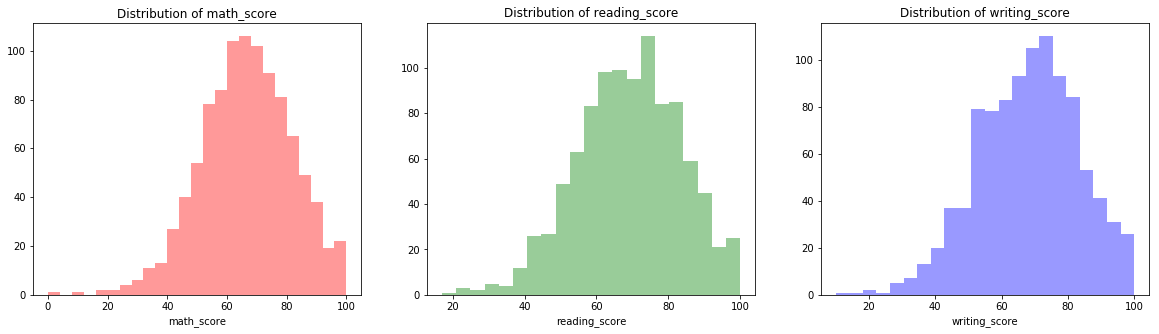

In [9]:
# displot for score variables individually
plt.figure(figsize = [20, 5])

# left plot: showing distribution of math_score
plt.subplot(1, 3, 1)
plt.title('Distribution of math_score')
sb.distplot(df.math_score, color = 'r', kde = False)

# central plot: showing distribution of reading_score
plt.subplot(1, 3, 2)
plt.title('Distribution of reading_score')
sb.distplot(df.reading_score, color = 'g', kde = False)

# right plot: showing distribution of writing_score
plt.subplot(1, 3, 3)
plt.title('Distribution of writing_score')
sb.distplot(df.writing_score, color = 'b', kde = False)
plt.show()

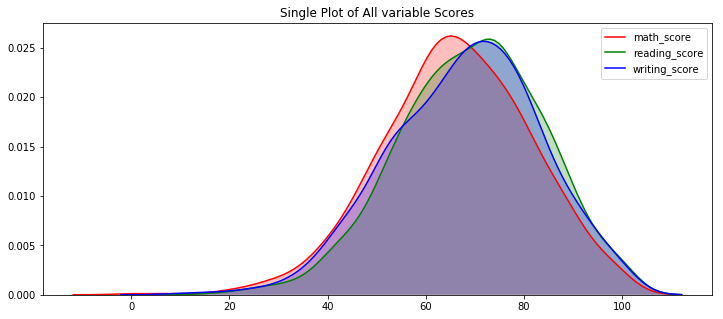

In [10]:
# kdeplot for score variables in single plot
fig, ax = plt.subplots(figsize=(12, 5))

plt.title('Single Plot of All variable Scores')

sb.kdeplot(df.math_score, color = 'r', shade = True)
sb.kdeplot(df.reading_score, color = 'g', shade = True)
sb.kdeplot(df.writing_score,  color = 'b', shade = True)
plt.show()

## Correlations between Numeric Features

> This shows that all the scores features are highly correlated with each other and so was percentage with all the score features because it is an engineered feature and calculated as an average of all the score values.

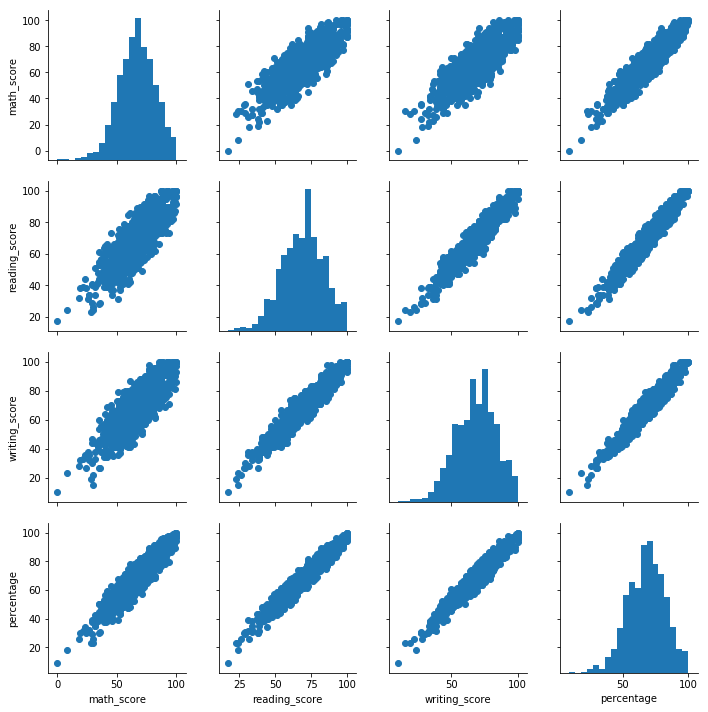

In [11]:
# plot matrix
num_vars = ['math_score', 'reading_score', 'writing_score', 'percentage']
m = sb.PairGrid(data = df, vars = num_vars)
m = m.map_diag(plt.hist, bins = 20);
m.map_offdiag(plt.scatter)
plt.show()

## Numerical figures divided by gender.
> This shows that female students overall have done better than male students. I think this can be because female students are more in number than male students in the datasets.

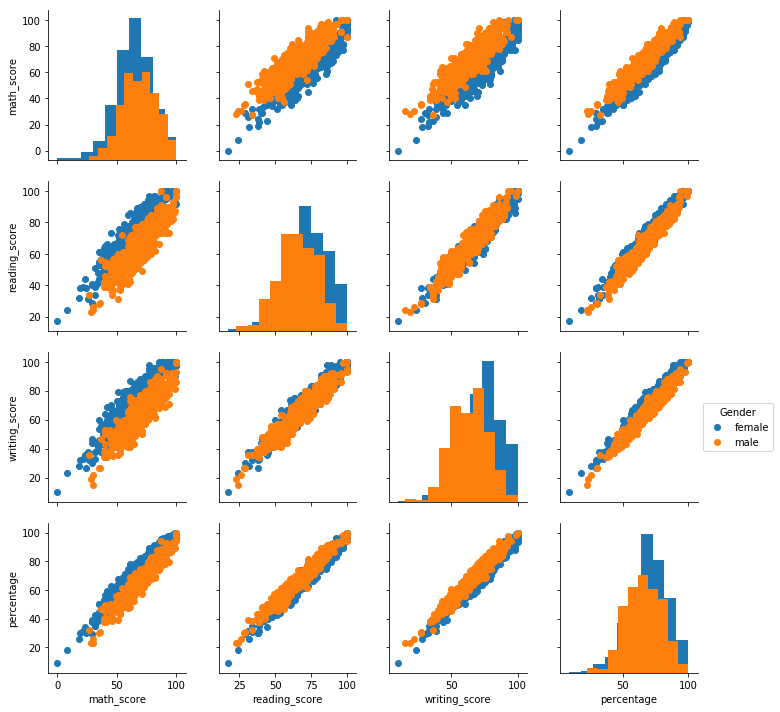

In [12]:
# plotting PairGrid
h = sb.PairGrid(data = df, hue = 'gender')
h.map_diag(plt.hist)
h.map_offdiag(plt.scatter)
plt.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = 'Gender')
plt.plot();

## Numeric Values Segregated by Test Preparation Course
> Here also students who have completed the test preparation course have done much better than those who haven't. This I can say it is like an assessement to get student prepared against exams.

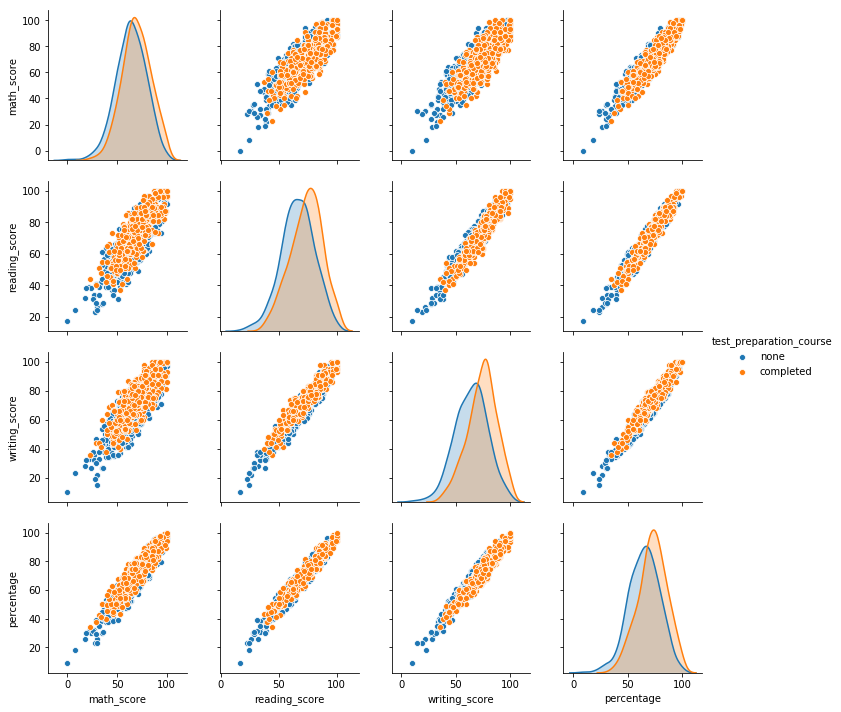

In [13]:
# plotting pairplot
sb.pairplot(data = df, hue = 'test_preparation_course');

## Qualitative Variable with Percentage

> This explain further that students who completed the test_preparation_course scored high percentage. And female students did well in both the categories of test_prepar̥ation_course.

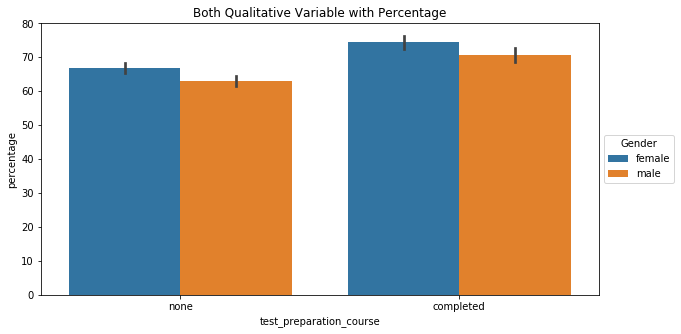

In [14]:
# barplot for both qualitative variable with percentage
plt.figure(figsize = (10, 5))
bp = sb.barplot(data = df, x = 'test_preparation_course', y = 'percentage', hue = 'gender')
bp.legend(loc = 6, bbox_to_anchor = (1.0, 0.5), title = 'Gender')
plt.title('Both Qualitative Variable with Percentage')
plt.show();

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert students_performance_in_exams_part_II.ipynb --to slides --post serve --no-input --no-prompt